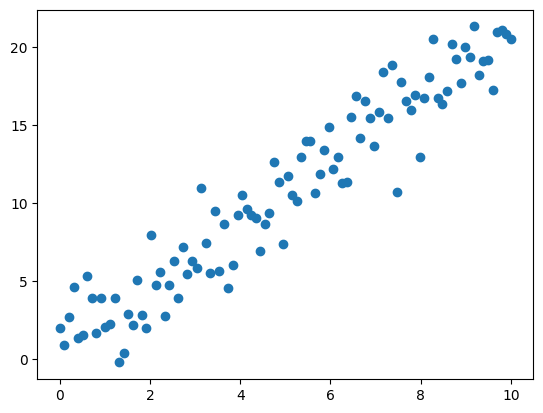

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(42)
n = 100
x = np.linspace(0, 10, n)
epsilon = np.random.normal(0, 2, n)
y = 2*x + 1 + epsilon
trainExample = list(zip(x, y))
plt.scatter(x, y)

In [5]:
# Linear Regression implementation
def phi(x):
    return np.array([x, 1])


def initialWeightVector():
    return np.zeros(2)


def trainloss(w):
    return (1.0 / len(trainExample)) * sum(
        (w.dot(phi(x_i)) - y_i) ** 2 for x_i, y_i in trainExample
    )


def gradientTrainLoss(w):
    return (1.0 / len(trainExample)) * sum(
        2 * (w.dot(phi(x_i)) - y_i) * phi(x_i) for x_i, y_i in trainExample
    )


def gradientDescent(L, gradientL, initialWeightVector, eta=0.01, max_inters=20, step=2):
    w = initialWeightVector()
    history = []
    for i in range(max_inters):
        value = L(w)
        gradient = gradientL(w)
        w_new = w - eta * gradient
        history.append(value)

        if i % step == 0:
            grad_norm = np.linalg.norm(gradient)
            print(
                f"Epoch {i}: Weight Vector = {w}, TrainLoss = {value:.6f}, Gradient Norm = {grad_norm:.6f}"
            )

        w = w_new
    return w, history

In [6]:
eta = 0.01
w, loss_history = gradientDescent(trainloss, gradientTrainLoss, initialWeightVector, eta=eta)

Epoch 0: Weight Vector = [0. 0.], TrainLoss = 154.684840, Gradient Norm = 144.025460
Epoch 2: Weight Vector = [1.87227238 0.28497649], TrainLoss = 4.777945, Gradient Norm = 14.285604
Epoch 4: Weight Vector = [2.057513   0.31625629], TrainLoss = 3.302760, Gradient Norm = 1.426709
Epoch 6: Weight Vector = [2.07543645 0.32234432], TrainLoss = 3.287693, Gradient Norm = 0.217883
Epoch 8: Weight Vector = [2.07676963 0.32590423], TrainLoss = 3.286999, Gradient Norm = 0.165458
Epoch 10: Weight Vector = [2.07646178 0.32918412], TrainLoss = 3.286458, Gradient Norm = 0.163243
Epoch 12: Weight Vector = [2.07599553 0.33240726], TrainLoss = 3.285929, Gradient Norm = 0.161620
Epoch 14: Weight Vector = [2.07551789 0.33559607], TrainLoss = 3.285411, Gradient Norm = 0.160020
Epoch 16: Weight Vector = [2.07504338 0.33875306], TrainLoss = 3.284903, Gradient Norm = 0.158435
Epoch 18: Weight Vector = [2.07457342 0.34187876], TrainLoss = 3.284404, Gradient Norm = 0.156866


In [7]:
print(f'Final weights: w = {w}')

Final weights: w = [2.07410809 0.3449735 ]


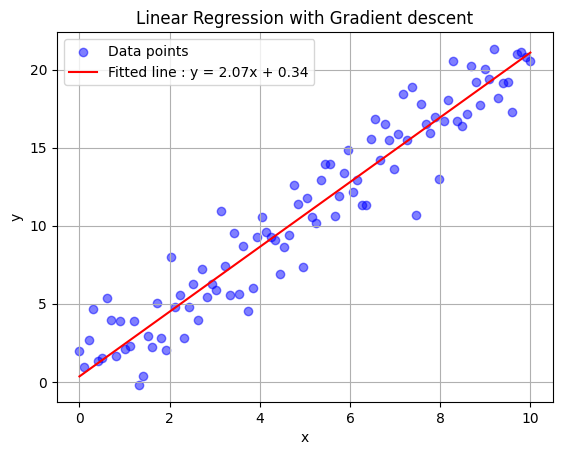

In [ ]:
plt.scatter(x, y, color="blue", label="Data points", alpha=0.5)
x_plot = np.linspace(0, 10, 100)
y_plot = w[0] * x_plot + w[1]
plt.plot(
    x_plot, y_plot, color="red", label=f"Fitted line : y = {w[0]:.2f}x + {w[1]:.2f}"
)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression with Gradient descent")
plt.legend()
plt.grid(True)
plt.show()